# Applied Mathematics for Computer Science(2016~2017)

## Homework1' . Polynomial Curve Fitting with `Tensorflow`.

### Goal

Implement polynomial curve fitting in python and with TensorFlow (optionally).

### Requirement

1. sample the function curve of $y=\textrm{sin}(x)$ with Gaussian noise

2. fit degree 3 and 9 curves in 10 samples

3. fit degree 9 curves in 15 and 100 samples

4. fit degree 9 curve in 10 samples but with **regularization term**

In [31]:
# Author: Li Bin
# ID card: 11531041.
# Time: 2017/2/28

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
class Curve_fitting(object):
    """ The class `curve fitting` is designed for task curve fitting with either `Least Square`
        or `Stochastic Gradient Descent` method.
        
        It receives several parameters then learn by itself and output the result.
    
    # Args:
        1. n_samples: [Scalar], decide how many samples do we need in this simple model.
        2. order: [Scalar], decide which order you want to fit.
        3. lr: (Optional) [Scalar], learning rate for tensorflow.
        4. regular: bool, whether we use regularization or not.
        
    # Return:
        1. matplotlib figure.
    """
    
    def __init__(self, n_samples, order, lr=0.01, max_iter=20000, regular=False):
        """Setting parameters.
        """
        self.n_samples = n_samples
        self.order     = order
        self.regular   = regular
        self.lr        = lr
        self.max_iter  = max_iter
        self.lamda     = np.exp(-5)  # Regular parameter term.
        self.show_result()
    
    def _generate_sample(self):
        """ Return (n_samples-by-1) x and y and (1000-by-1) x and y.
        """
        noise = (np.random.rand(self.n_samples) - .5)
        self.x_sample = np.linspace(0, 1, self.n_samples)
        self.x_line   = np.linspace(0, 1, 1000)
        self.y_sample = np.sin(2 * np.pi * self.x_sample) + noise
        self.y_line   = np.sin(2 * np.pi * self.x_line)
    
    def _infer(self, X, y):
        """ Gradient Descent to infer parameter via `tensorflow`.
        
        # Args:
            1. X: ndarray(shape: n_samples x 1), need to convert to n_samples x n_order.
            2. y: ndarray(shape: n_samples), need to reshape to (n_samples x 1)
        
        # Returns:
            1. w: ndarray(shape: n_order x 1)
        """
        
        train_x = np.stack([X**i for i in range(0, self.order+1)], axis=1)
        train_y = y.reshape(self.n_samples, 1)
        
        _x = tf.placeholder(tf.float32, shape=(self.n_samples, self.order+1))
        _y = tf.placeholder(tf.float32, shape=(self.n_samples, 1))
        w = tf.Variable(tf.truncated_normal(shape=(self.order+1, 1), stddev=0.1))
        
        pred = tf.matmul(_x, w)
        loss = tf.reduce_sum(tf.pow(pred-_y, 2))
        loss_regular = tf.reduce_sum(tf.pow(pred-_y, 2)) + tf.reduce_sum(tf.pow(w, 2)) * self.lamda
        
        optimizer = tf.train.AdamOptimizer(0.01)
        if self.regular:
            train = optimizer.minimize(loss_regular)
        else:
            train = optimizer.minimize(loss)
        
        init = tf.global_variables_initializer()     
        
        with tf.Session() as sess:
            sess.run(init)
            for idx in range(self.max_iter):
                if idx % 5000 == 0:
                    print("Iteration: {:>5}, loss: {}".format(idx, sess.run(loss, {_x:train_x, _y:train_y})))
                sess.run(train, {_x:train_x, _y:train_y})
            return w.eval()
    
    def show_result(self):
        self._generate_sample()

        plt.scatter(self.x_sample, self.y_sample, color='w', linewidth=1.5,edgecolors='b', label='Samples')
        plt.plot(self.x_line, self.y_line, color='g', linewidth=2, label='True curve')
        
        # learn weights via least square.
        w = self._infer(self.x_sample, self.y_sample)
        
        # plot get y_estimation via weights.
        X = np.stack([self.x_line**i for i in range(0, self.order+1)], axis=1)
        y_estimate = np.dot(X, w)
        
        # plot estimate line.
        plt.plot(self.x_line, y_estimate, color='r', linewidth=2, label='Fitted curve')
        plt.legend(loc='lower left')
        plt.text(1, 0.7, '$M$ = {}\n$N$ = {}'.format(self.order, self.n_samples))
        plt.xlabel('$x$')
        plt.ylabel('$t$')
        plt.title("fit degree {} curves in {} samples".format(self.order, self.n_samples))

Iteration:     0, loss: 4.699325084686279
Iteration:  5000, loss: 0.5836209654808044
Iteration: 10000, loss: 0.582802414894104
Iteration: 15000, loss: 0.5828035473823547


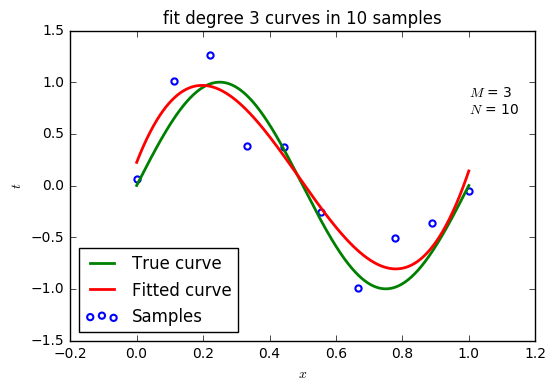

In [33]:
m3_n10 = Curve_fitting(10, 3)

Iteration:     0, loss: 6.084689140319824
Iteration:  5000, loss: 0.46561646461486816
Iteration: 10000, loss: 0.23158934712409973
Iteration: 15000, loss: 0.16572363674640656


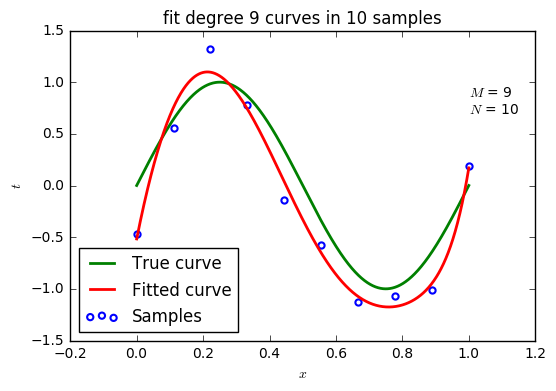

In [35]:
m9_n10 = Curve_fitting(10, 9)

Iteration:     0, loss: 9.35472297668457
Iteration:  5000, loss: 1.0034642219543457
Iteration: 10000, loss: 0.974601149559021
Iteration: 15000, loss: 0.9570443630218506


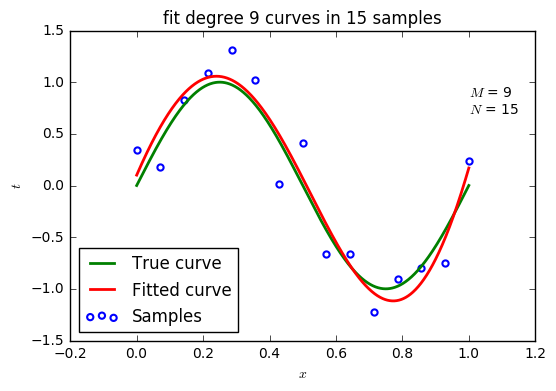

In [36]:
m9_n15 = Curve_fitting(15, 9)

Iteration:     0, loss: 73.70423889160156
Iteration:  5000, loss: 10.751435279846191
Iteration: 10000, loss: 10.376721382141113
Iteration: 15000, loss: 10.291316032409668


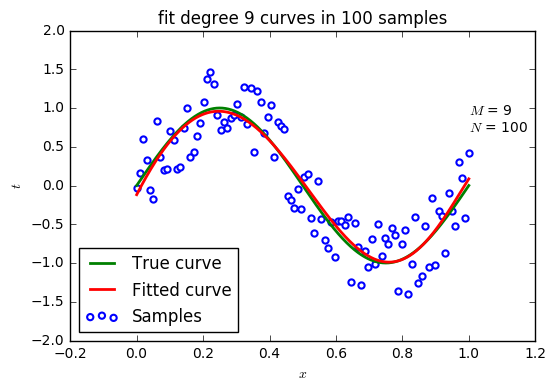

In [37]:
m9_n100 = Curve_fitting(100, 9)

Iteration:     0, loss: 4.7731781005859375
Iteration:  5000, loss: 1.1424734592437744
Iteration: 10000, loss: 1.142482042312622
Iteration: 15000, loss: 1.1424723863601685


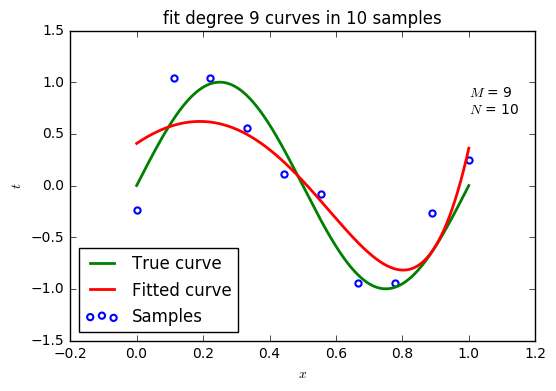

In [38]:
m9_n10_regular = Curve_fitting(10, 9, regular = True)